In [1]:
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Provide the path to the trajectory .dcd and .prmtop files 
top='/home/rutika/nucleosome/production/wildtype/1kx5_015M_OPC.prmtop'
traj='/home/rutika/nucleosome/production/wildtype/1kx5_wild_015_unwrap_1us.dcd'
u = mda.Universe(top,traj)

/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/topology/TOPParser.py:295: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)
/home/rutika/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
#select the residues to plot the distances by providing resid 
from MDAnalysis.analysis import distances
sel1 = u.select_atoms('resid 1148 1154 1155 1158 1159 1163 1166 1167 1170 1171 1172 1173')
sel2 = u.select_atoms('resid 1148 1154 1155 1158 1159 1163 1166 1167 1170 1171 1172 1173')
avg = np.zeros((12,12), dtype=float)
for ts in u.trajectory:
    sel1_com = sel1.center_of_mass(compound='residues')
    sel2_com = sel2.center_of_mass(compound='residues')
    res_dist = distances.distance_array(sel1_com, sel2_com,
                                    box=u.dimensions)
    avg = avg + res_dist
res_dist_avg= avg/len(u.trajectory)
print(res_dist_avg)
n_LID = len(sel1_com)
n_NMP = len(sel2_com)
DH = pd.DataFrame(res_dist_avg)
DH.to_csv("Contact_wt_015_h2b2.csv")

[[ 0.         16.0019202  19.07441477 19.57215882 20.84716642 24.19324123
  29.58325676 30.62050419 28.18408566 32.30516197 29.85374905 27.13233878]
 [16.0019202   0.          6.15278431  9.17629999 10.5298756  15.08839793
  21.41503296 23.73631782 19.73140245 25.25779519 23.96707381 21.24197284]
 [19.07441477  6.15278431  0.          8.925789   10.19317493 16.14204123
  22.3454487  25.1762712  20.65976027 26.33852663 25.58046204 22.84179435]
 [19.57215882  9.17629999  8.925789    0.          6.49179663 12.55939108
  19.75107235 22.83363109 19.73788462 24.92114099 24.96457298 23.08567901]
 [20.84716642 10.5298756  10.19317493  6.49179663  0.         10.66585275
  17.74971436 21.53965308 18.14041791 23.41339468 24.00844095 22.10700272]
 [24.19324123 15.08839793 16.14204123 12.55939108 10.66585275  0.
  10.01825241 13.36604407 12.0896913  16.29423197 17.5533103  17.34842766]
 [29.58325676 21.41503296 22.3454487  19.75107235 17.74971436 10.01825241
   0.          6.10041452  6.06991761  7

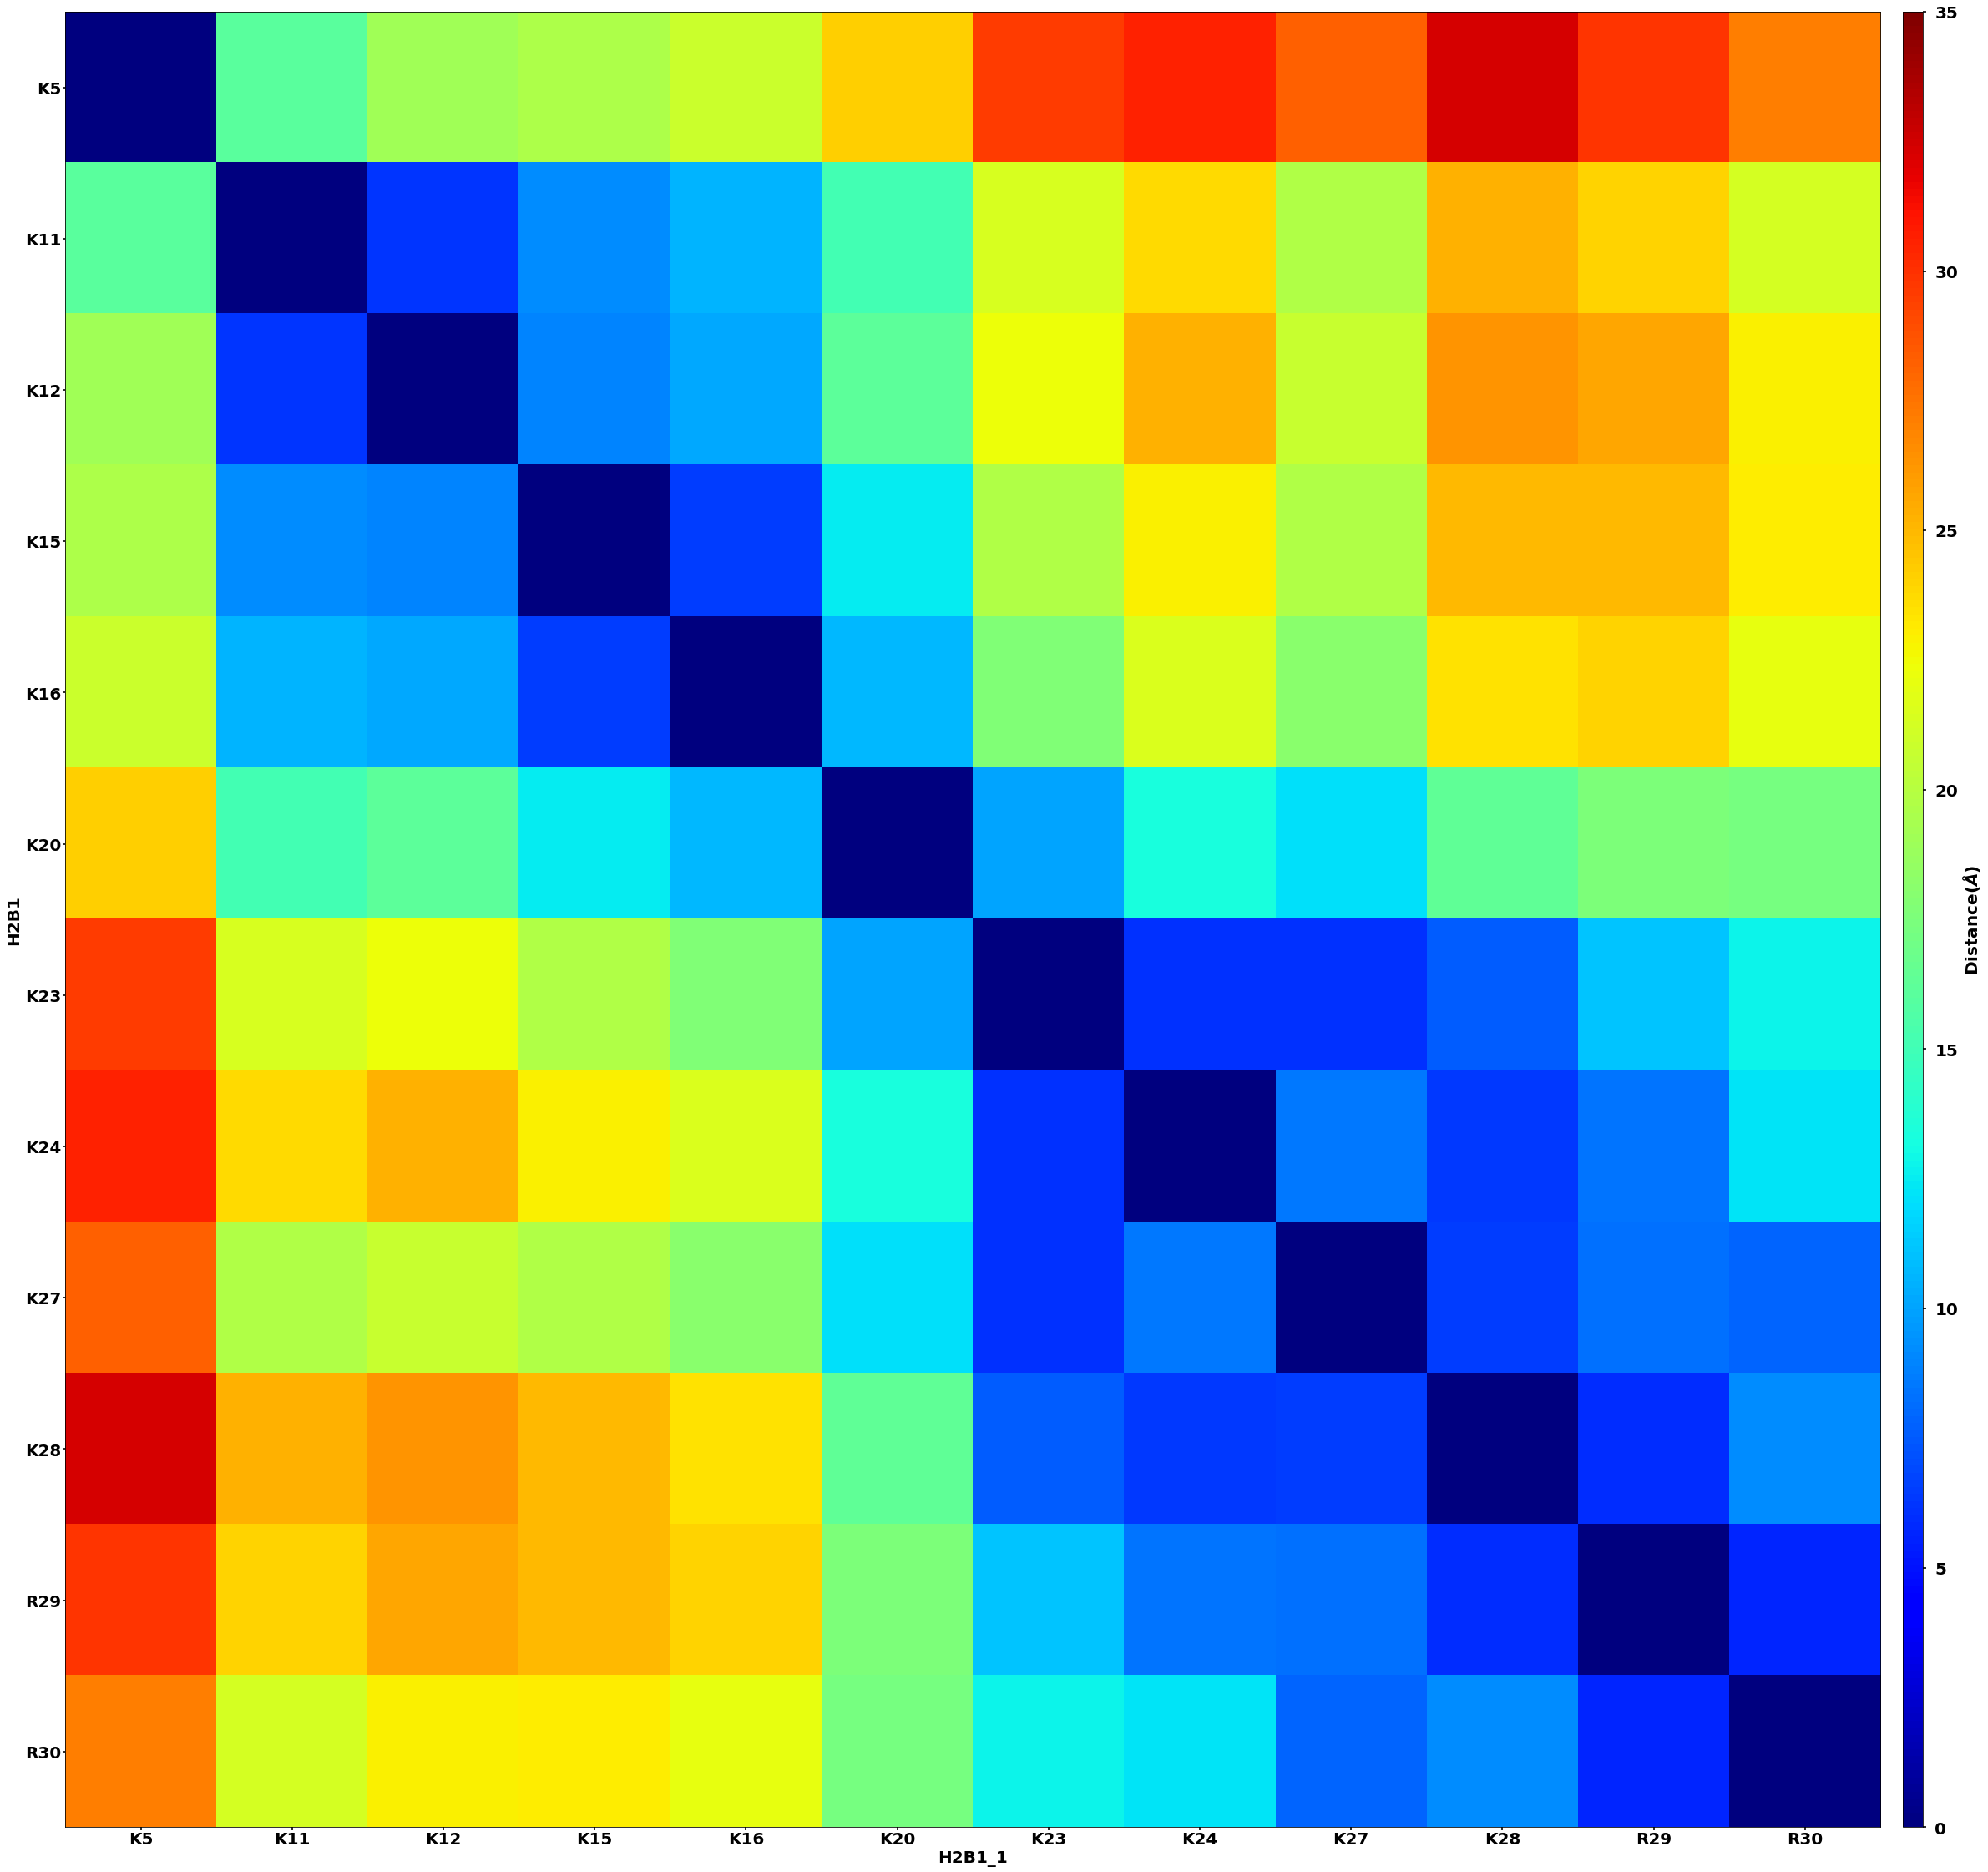

In [7]:
plt.style.use('seaborn-poster')
fig2, ax2 = plt.subplots(figsize=(47, 40))
im = ax2.imshow(res_dist_avg, origin='upper',  cmap = 'jet', vmin=0, vmax=35)
plt.ylabel("H2B1", fontsize = 20.0, fontweight="bold")
plt.xlabel("H2B1_1", fontsize = 20.0, fontweight="bold")
H2B1 =['K5', 'K11', 'K12', 'K15', 'K16', 'K20',  'K23', 'K24', 'K27', 'K28', 'R29', 'R30']
H2B1_1 = ['K5', 'K11', 'K12', 'K15', 'K16', 'K20',  'K23', 'K24',  'K27', 'K28', 'R29', 'R30']
plt.tick_params(labelsize=12, pad=1)

# add residue ID labels to axes
tick_interval =1
ax2.set_yticks(np.arange(n_LID)[::tick_interval])
ax2.set_xticks(np.arange(n_NMP)[::tick_interval])
ax2.set_yticklabels(H2B1)
ax2.set_xticklabels(H2B1_1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# colorbar
cbar2 = fig2.colorbar(im, pad = 0.01, aspect = 90)
cbar2.ax.set_ylabel('Distance($\AA$)', fontsize = 20.0)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
cbar2.ax.tick_params(labelsize=20)
plt.tick_params(labelsize=20, pad=1)
plt.savefig('WT_H2B_intratail.svg', format="svg",transparent=True)
plt.show()